# Binärbäume

#### Vorbereitung

Dieses notebook benötigt das Networkx package zur Visualisierung. Wenn Sie Annaconda nutzen, können Sie dies mit dem Befehl 
```
conda install -c conda-forge networkx
```
installieren. In google colab sollte dies bereits zur Verfügung stehen. 

#### Hilfsfunktionen zum Visualisieren von Bäumen

Als erstes definieren wir uns die Hilfsfunktionen ```showTree``` mit der wir einen Baum grafisch darstellen können. Sie müssen diesen Code nicht verstehen, müssen die Zelle aber ausführen, damit Ihnen die ``` showTree``` Funktion zur Verfügung steht. 

In [6]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt

class NodeWithId:
    def __init__(self, value, id, left, right):
        self.item = value
        self.id = id
        self.left = left
        self.right = right
        
def _augmentTreeWithId( t, n):
    if t == None:
        return (None, n)
    else:        
        (leftNode, newN) = _augmentTreeWithId(t.left, n)
        (rightNode, rightN) = _augmentTreeWithId(t.right, newN + 1)
        return (NodeWithId(t.item, newN + 1, leftNode, rightNode), rightN )

def _buildTreeGraph(g, t, parentNode, depth):
    if t == None:
        return
    _buildTreeGraph(g, t.left, t, depth + 1)
    g.add_node(t.id, pos=(t.id, -depth), label=str(t.item))
    if (parentNode != None):
        g.add_edge(t.id, parentNode.id)
    _buildTreeGraph(g, t.right, t, depth + 1)

def showTree(t):
    g = nx.Graph()
    (tt, _) = _augmentTreeWithId(t, 0)
    _buildTreeGraph(g, tt, None, 0)
    pos=nx.get_node_attributes(g,'pos')
    labels = nx.get_node_attributes(g, 'label')
    
    nx.draw_networkx_nodes(g, pos, node_size=1000, node_color='#00b4d9')
    nx.draw_networkx_edges(g, pos)
    nx.draw_networkx_labels(g, pos, labels)

### Erstellen einfacher Bäume

Wir führen als erstes die grundlegende Datenstruktur ein. Wir folgen der rekursiven Definition. Ein Baum ist eine Wurzel, die ein Datenelement (hier das Feld item) sowie eine Referenz auf einen linken und einen rechten Unterbaum speichert.

In [7]:
class BinaryTree:
    def __init__(self, item, left, right):
        self.item = item
        self.left = left
        self.right = right

Den leeren Baum definieren wir als den Wert ```None```.

Wir können uns nun bereits einen ersten Baum definieren.

In [8]:
b = BinaryTree("root", 
               BinaryTree("left", None, None), 
               BinaryTree("right", None, None)
              )

Dieser Baum besteht aus der Wurzel, sowie jeweils einem linken und rechten Teilbaum. Der linke und der rechte Teilbaum ist jeweils ein Blatt.  Mit der ```showTree``` funktion können wir den Baum nun visualisieren. 

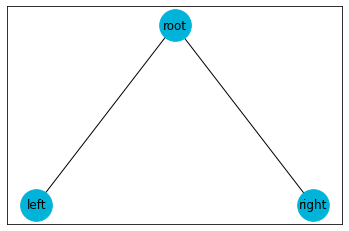

In [9]:
showTree(b)

Es ist einfach, sich aus einzelnen Teilbäumen einen komplexeren Baum zusammenzubauen.

In [5]:
leftSubtree = BinaryTree("l", 
               BinaryTree("ll", None, None), 
               BinaryTree("lr", None, None))
rightSubtree = BinaryTree("r", 
               BinaryTree("rl", None, None), 
               BinaryTree("rr", None, None))
tree = BinaryTree("root", leftSubtree, rightSubtree)

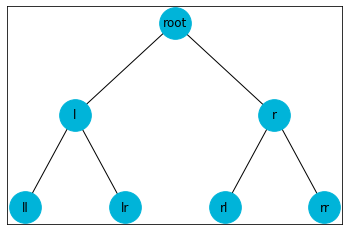

In [6]:
showTree(tree)

# Traversierungsarten

Genau wie eine Liste, kann ein Baum als Sequenz von Elementen interpretiert werden. Die Reihenfolge dieser Sequenz ist aber nicht eindeutig, sondern hängt davon ab, wie der Baum traversiert wird. 

Wir unterscheiden zwischen *depth-first* Traversierung und *breadth-first* Traversierung. Bei der depth-first Traversierung unterscheiden wir zusätzlich zwischen *preorder*, *postorder* und *inorder* Traversierung. Es gibt jedoch viele weitere Möglichkeiten einen Baum zu traversieren.

#### Inorder Traversierung

Bei der Inorder Traversierung wird zuerst der linke Teilbaum traversiert, danach wird der Wurzelknoten des jeweiligen Unterbaums verarbeitet, und zum Schluss wird der rechte Teilbaum traversiert. Die Implementation ist ganz einfach: Wir folgen einfach der Definition der Datenstruktur. 

In [7]:
def printTreeInorder(t):
    if (t == None):
        return
    else:
        printTreeInorder(t.left)
        print(t.item)
        printTreeInorder(t.right)

Wenn wir die Funktion aufrufen, können wir nachverfolgen, in welcher Reihenfolge die Knoten besucht werden. 

In [8]:
printTreeInorder(tree)

ll
l
lr
root
rl
r
rr


#### Preorder Traversierung

Bei der Preorder Traversierung, wird zuerst das Element an der Wurzel verarbeitet, bevor wir den linken und den rechten Teilbaum traversieren.

In [9]:
def printTreePreorder(t):
    if (t == None):
        return
    else:
        print(t.item)
        printTreePreorder(t.left)        
        printTreePreorder(t.right)

In [10]:
printTreePreorder(tree)

root
l
ll
lr
r
rl
rr


#### Postorder Traversierung

Analog dazu verhält sich auch die Postorder Traversierung. Hier wird  die Wurzel einfach zuletzt (also nach dem linken und rechten Teilbaum) verarbeitet.

In [11]:
def printTreePostorder(t):
    if (t == None):
        return
    else:
        printTreePostorder(t.left)        
        printTreePostorder(t.right)
        print(t.item)

In [12]:
printTreePostorder(tree)

ll
lr
l
rl
rr
r
root


#### Breadth-first Traversierung 

Bei der preorder, inorder und postorder Traversierung, gehen wir immer zuerst in die Tiefe. Diese Traversierungsarten sind besonders einfach zu implementieren, da sie der rekursiven Struktur der Datenstruktur folgen. 
Manchmal wollen wir aber trotzdem die Elemente Ebene für Ebene bearbeiten. Die sogenannte Breadth-first Traversierung ist etwas schwieriger zu implementieren. Die einfachste Variante ist, alle Knoten einer Ebene in einer Queue zu speichern und dann jeweils den ersten Knoten der Queue zu verarbeiten. Für jeden Knoten werden dann die Kinder wieder in die Queue eingefügt. Wir iterieren dann solange, bis alle Elemente in der Queue abgearbeitet sind. Die Implementation ist also hier nicht rekursiv, sondern interativ. 

Als Queue nutzen wir hier einfachheitshalber  eine Python List. Die Operation ```pop(0)``` entspricht dann der dequeue Operation und append der enqueue Operation. 

In [13]:
def printTreeBreadthFirst(tree):
    if tree == None:
        return    
    queue = [tree]
    
    while len(queue) > 0:  
        
        currentNode = queue.pop(0)        
        if currentNode.left != None:
            queue.append(currentNode.left)
        if currentNode.right != None:
            queue.append(currentNode.right)
        print(currentNode.item)
        

In [14]:
printTreeBreadthFirst(tree)

root
l
r
ll
lr
rl
rr
